# Machine Learning | Decision Tree Laboratory Activity

**Name:** `[  Mosqueda, Christine Reisa  ]`

___

**Instructor/Professor:** Jocelyn B. Barbosa

**Course Code:** IT325 / IT3R9

*IT3R9*

### 🤖 Import Standard Libraries

In [1]:
# code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

### 🔃 Load Dataset

- https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv
- <a href="https://github.com/jayachandru001/Heart-Failure-Prediction-">Data Description</a>


In [2]:
# code here
df = pd.read_csv("https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv")
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### 🔎Examine Dataset

- Descriptive Statistics / Hypothesis Test
- Look for Null Values / Outliers

In [4]:
# code here
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [5]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


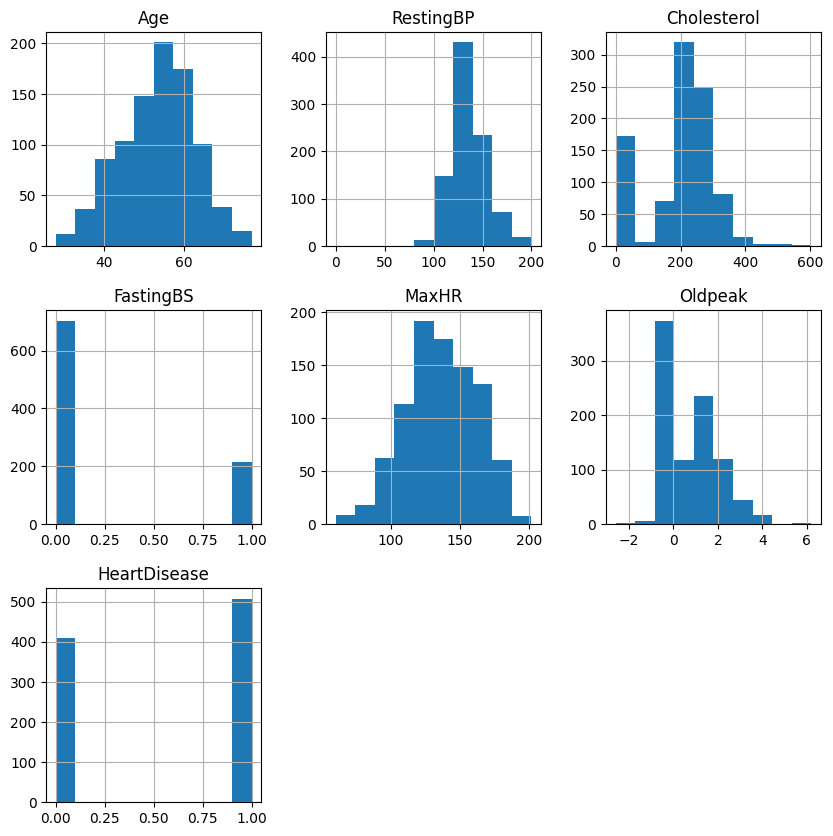

In [7]:
df.hist(figsize=(10,10))
plt.show()

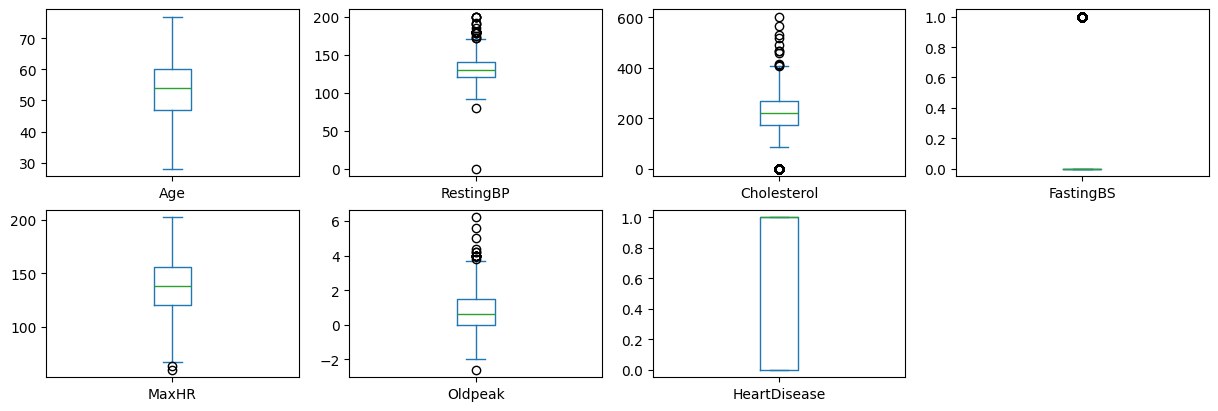

In [8]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

### 🧩Prepare Dataset
- Treat null values / outliers
- Data Transformation
- Train Test Split (75:25)

In [9]:
# no null or na values, therefore treat outliers

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Calculate IQR 
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
is_outlier = (df[continuous_cols] < (Q1 - 1.5 * IQR)) | (df[continuous_cols] > (Q3 + 1.5 * IQR))

# Remove rows with outliers
df_no_outliers = df[~(is_outlier.any(axis=1))]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (918, 12)
Dataset shape after removing outliers: (588, 12)


In [10]:
# data transformation
pd.get_dummies(df_no_outliers)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [11]:
# train test split using the df with no outliers
X = df_no_outliers.drop('HeartDisease', axis=1)
y = df_no_outliers['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

### 👶🏼Train Decision Tree Model

- Experiment on the model parameters.

In [12]:
# code here
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False  
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


# train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])],
                                   verbose_feature_names_out=False)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### 🧪Evaluate Model
- Confusion Matrix

In [13]:
# code here
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.80


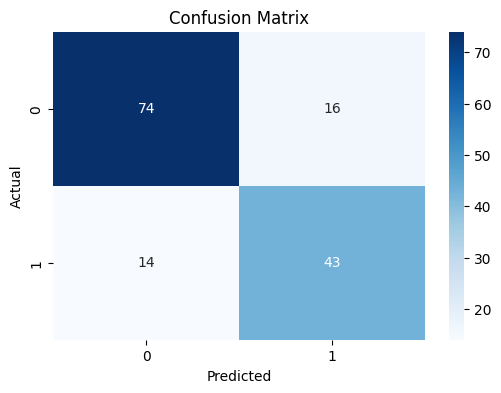

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        90
           1       0.73      0.75      0.74        57

    accuracy                           0.80       147
   macro avg       0.78      0.79      0.79       147
weighted avg       0.80      0.80      0.80       147



In [14]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

### 📒Conclusion

In this activity, we are tasked to develop a Decision Tree Induction Classifier to predict the likelihood of a patient having a heart disease or not, based on the given patient features. The dataset included both numerical and categorical variables such as age, cholesterol levels, ECG results, and patient symptoms like chest pain type and exercise-induced angina.

In [15]:
# test a new patient data

new_data = pd.DataFrame([{
    'Age': 60,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingBP': 130,
    'Cholesterol': 250,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.0,
    'ST_Slope': 'Up'
}])

prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

print("Prediction (0 = No Heart Disease, 1 = Heart Disease):", prediction[0])
print("Prediction Probabilities:", probability[0])


Prediction (0 = No Heart Disease, 1 = Heart Disease): 1
Prediction Probabilities: [0. 1.]


For demonstration purposes, I tested the prediction of the trained DTI model above by inserting a new patient data.

All of the procedures done, the DT model successfully learned from the dataset and predicted heart disease with measurable accuracy. This model can be valuable in understanding which patient features contribute most to predicting heart disease.